# Кейс Ковчег (черный)

**Кейс**
- Компания планирует проводить тестовые запуски рекламы 1 раз в день
- Нельзя, чтобы каждый клиент получал каждый день новое рекламное
сообщение очередной рекламной кампании
- Тестовые запуски будут проводиться на маленьких выборках из всех клиентов
- Всего клиентов 80 тысяч, размер выборки — 400
- Выборка должна быть репрезентативной, чтобы замеры на ней позволяли
делать хотя бы какие-то выводы обо всех клиентах
- Проверку репрезентативности можно осуществить на основе одной кампании,
которую проводили на всех 80 тысячах клиентов

**Проблема**

Если один раз составить репрезентативную выборку и использовать её во всех
тестах, будем наблюдать эффект очередной рекламы на человека, которому
и так каждый день показывают рекламу

**Идея решения**

Разработать алгоритм, который будет формировать каждый раз новую выборку
для тестового запуска очередной рекламной кампании

**Роль**

Аналитик отдела работы с клиентами

**Задача**

- Написать функцию на языке Python, которая формирует выборки
- Проверить, что функция формирует выборки репрезентативно
- Подготовить слайды: объяснить способ формирования выборок и показать,
насколько репрезентативные выборки он формирует

**Доступные данные**

Датасет ark.csv содержит данные обо всех клиентах компании: возраст,
пол, совершил ли покупку по итогам рекламной кампании

**Ожидаемый результат**

- Презентация на слайдах в формате pdf
- Jupyter Notebook в Google Colab с расчётами

In [1]:
from cProfile import label

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv')
df.head()

,Id,Age,Gender,Purchased
0,id1,<25,Male,No
1,id2,<25,Female,No
2,id3,<25,Female,Yes
3,id4,<25,Male,No
4,id5,25+,Male,No


In [5]:
# Стили

palette = {
    'light': '#FAFAFA',
    'black': '#141414',
    'gray-light': '#E6E6E6',
    'sub-gray': '#969696',
    'green': '#009B40',
    'electric_blue': '#3044FF',
    'ambitious_red': '#3044FF',
    'legent_yellow': '#FFDD2D',
    'bright_fuchsia': '#DB45E8',
}


def stylize(plt, fig, ax, dark=False):
    plt.rcParams["font.family"] = 'Graphik LCG'
    if dark:
        plt.rcParams['axes.edgecolor'] = palette['sub-gray']
        plt.rcParams['xtick.color'] = palette['sub-gray']
        plt.rcParams['ytick.color'] = palette['sub-gray']
        plt.rcParams['text.color'] = palette['light'] 
        plt.rcParams['axes.labelcolor'] = palette['light']
        plt.rcParams['axes.titlecolor'] = palette['light']
        fig.set_facecolor(palette['black'])
        ax.set_facecolor(palette['black'])
    else:
        plt.rcParams['axes.edgecolor'] = palette['sub-gray']
        plt.rcParams['xtick.color'] = palette['sub-gray']
        plt.rcParams['ytick.color'] = palette['sub-gray']
        plt.rcParams['text.color'] = palette['black'] 
        plt.rcParams['axes.labelcolor'] = palette['black']
        plt.rcParams['axes.titlecolor'] = palette['black']
        fig.set_facecolor(palette['light'])
        ax.set_facecolor(palette['light'])
        
    plt.xticks(fontweight='semibold')
    plt.yticks(fontweight='semibold')
    

1. Сделать N=10 000 повторов (сформировать выборку
и посчитать по выборке долю клиентов, купивших продукт)

2. Построить гистограмму для полученных N значений,
отметить на оси настоящую (от всех клиентов) долю
клиентов, купивших продукт

In [3]:
df['Purchased'] = df['Purchased'].map({'No': 0, 'Yes': 1})
df.head()

,Id,Age,Gender,Purchased
0,id1,<25,Male,0
1,id2,<25,Female,0
2,id3,<25,Female,1
3,id4,<25,Male,0
4,id5,25+,Male,0


In [7]:
df['Purchased'].mean()

np.float64(0.168175)

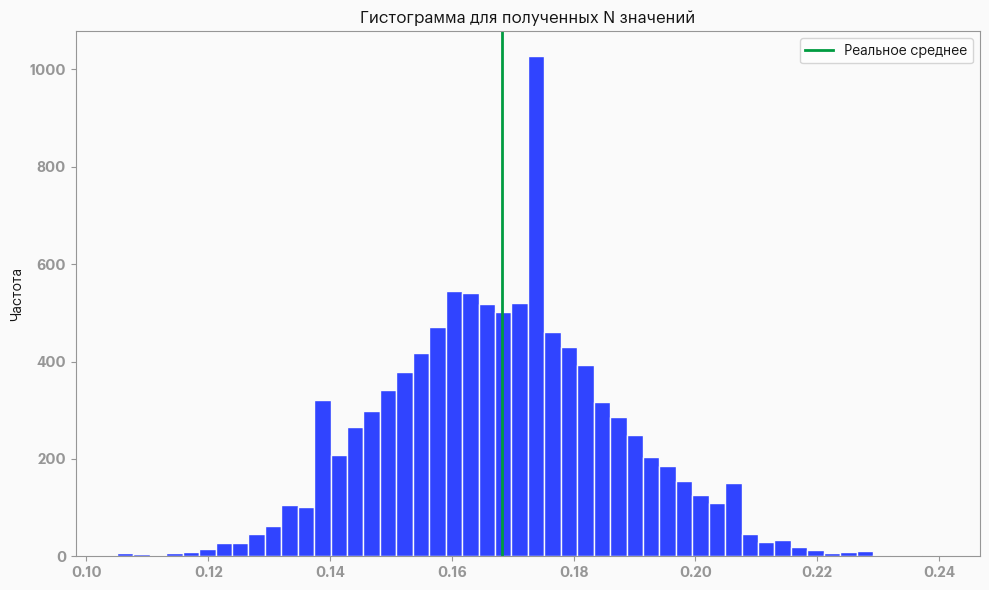

In [34]:

def get_sample(df, n=400):
    return df.sample(n)

def get_sample_mean(sample):
    return sample['Purchased'].mean()

N = 10_000

sample_means_simple = np.array([get_sample_mean(get_sample(df)) for _ in range(N)])

fig, ax = plt.subplots(figsize=(10, 6))
stylize(plt, fig, ax)
plt.hist(sample_means_simple, bins=50, color=palette['electric_blue'], edgecolor=palette['light'])
plt.axvline(df['Purchased'].mean(), color=palette['green'], label='Реальное среднее',linestyle='-', linewidth=2)
plt.legend()
plt.title('Гистограмма для полученных N значений')
plt.ylabel('Частота')

# Сохранение графика в файл с высоким разрешением
plt.tight_layout()
plt.savefig('histogram_random_sampling.png', dpi=150)
plt.show()

In [29]:
# Посчитаем насколько часто случайная выборка дает отклонение от реального среднего значения больше чем на 0.01

np.sum(np.abs(sample_means_simple - df['Purchased'].mean()) > 0.01) / N

np.float64(0.5986)

3. Сделать N=10 000 повторов (сформировать выборку и
посчитать по выборке долю клиентов, купивших продукт).

4. Построить гистограмму для полученных N значений,
отметить на оси настоящую (от всех клиентов) долю
клиентов, купивших продукт.

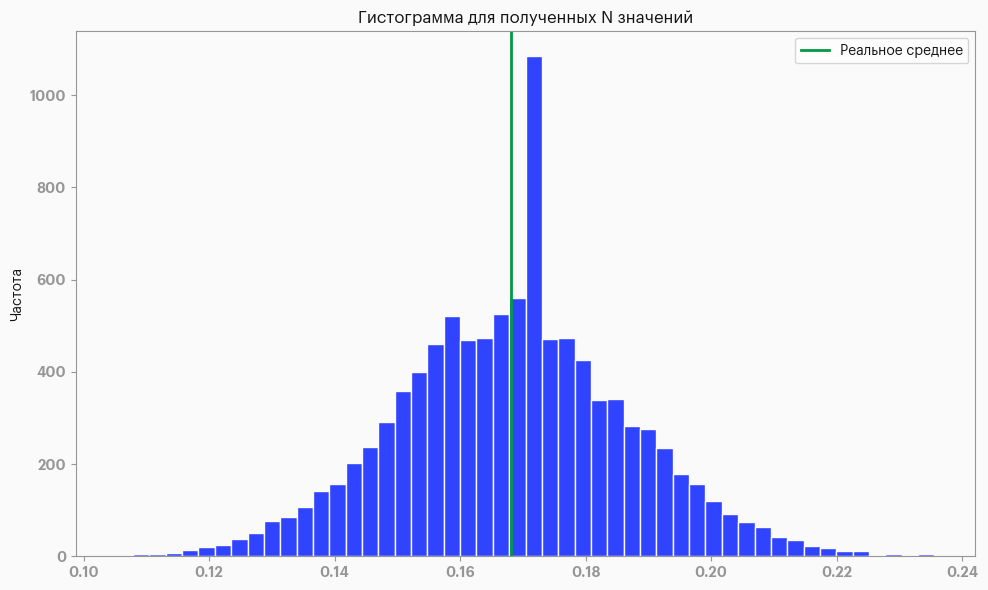

In [35]:
def get_stratified_sample(df, n=400):
    stratified_sample = df.groupby(['Age', 'Gender'], group_keys=False).apply(
        lambda x: x.sample(frac=n/len(df)),
        include_groups=False
    )
    return stratified_sample

# Функция для получения среднего значения по выборке
def get_sample_mean(sample):
    return sample['Purchased'].mean()

# Количество повторов
N = 10_000

# Получение средних значений по выборкам
sample_means_stratified = np.array([get_sample_mean(get_stratified_sample(df)) for _ in range(N)])

# Построение гистограммы
fig, ax = plt.subplots(figsize=(10, 6))
stylize(plt, fig, ax)
plt.hist(sample_means_stratified, bins=50, color='#3044FF', edgecolor='#FAFAFA')
plt.axvline(df['Purchased'].mean(), color='#009B40', label='Реальное среднее', linestyle='-', linewidth=2)
plt.legend()
plt.title('Гистограмма для полученных N значений')
plt.ylabel('Частота')

# Сохранение графика в файл с высоким разрешением
plt.tight_layout()
plt.savefig('histogram_stratified_sampling.png', dpi=150)
plt.show()

In [25]:
# Посчитаем насколько часто случайная выборка дает отклонение от реального среднего значения больше чем на 0.01

np.sum(np.abs(sample_means_stratified - df['Purchased'].mean()) > 0.01) / N

np.float64(0.595)

Сравнить на слайде метод простой случайной выборки и
метод стратифицированной случайной выборки.

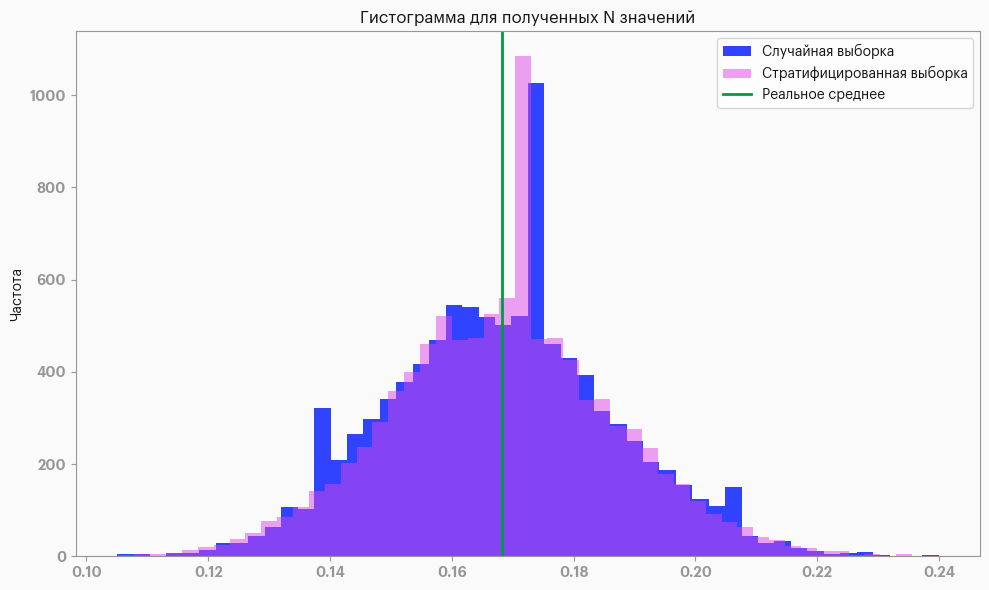

In [40]:

# Построение гистограммы
fig, ax = plt.subplots(figsize=(10, 6))
stylize(plt, fig, ax)

# Гистограмма для случайных выборок
plt.hist(sample_means_simple, bins=50, color=palette['electric_blue'], label='Случайная выборка')

# Гистограмма для стратифицированных выборок
plt.hist(sample_means_stratified, bins=50, color=palette['bright_fuchsia'], alpha=0.5, label='Стратифицированная выборка')

# Добавление линии для реального среднего значения
plt.axvline(df['Purchased'].mean(), color=palette['green'], label='Реальное среднее', linestyle='-', linewidth=2)

# Добавление легенды
plt.legend()
plt.title('Гистограмма для полученных N значений')
plt.ylabel('Частота')

# Сохранение графика в файл с высоким разрешением
plt.tight_layout()
plt.savefig('histogram_combined_sampling.png', dpi=150)
plt.show()